## Data Pre-processing: Analysing Engineering Graduate Salary

### Dataset Attributes:
1. ID: A unique ID to identify a candidate

2. Salary: Annual CTC offered to the candidate (in INR)

3. Gender: Candidate's gender

4. 10percentage: Overall marks obtained in grade 10 examinations

5. 10board: The school board whose curriculum the candidate followed in grade 10

6. 12graduation: Year of graduation - senior year high school

7. 12percentage: Overall marks obtained in grade 12 examinations

8. 12board: The school board whose curriculum the candidate followed

9. CollegeID: Unique ID identifying the university/college which the candidate
attended for her/his undergraduate

10. CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.

11. Degree: Degree obtained/pursued by the candidate

12. Specialization: Specialization pursued by the candidate

13. CollegeGPA: Aggregate GPA at graduation

14. CollegeCityID: A unique ID to identify the city in which the college is located in.

15. CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.

16. CollegeState: Name of the state in which the college is located

17. GraduationYear: Year of graduation (Bachelor's degree)

18. English: Scores in AMCAT English section

19. Logical: Score in AMCAT Logical ability section

20. Quant: Score in AMCAT's Quantitative ability section

21. Domain: Scores in AMCAT's domain module

22. ComputerProgramming: Score in AMCAT's Computer programming section

23. ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
24. ComputerScience: Score in AMCAT's Computer Science section

25. MechanicalEngg: Score in AMCAT's Mechanical Engineering section

26. ElectricalEngg: Score in AMCAT's Electrical Engineering section

27. TelecomEngg: Score in AMCAT's Telecommunication Engineering section

28. CivilEngg: Score in AMCAT's Civil Engineering section

29. conscientiousness: Scores in one of the sections of AMCAT's personality test

30. agreeableness: Scores in one of the sections of AMCAT's personality test

31. extraversion: Scores in one of the sections of AMCAT's personality test

32. nueroticism: Scores in one of the sections of AMCAT's personality test

33. openesstoexperience: Scores in one of the sections of AMCAT's personality test

### Loading and understanding the dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
data = pd.read_csv("Engineering_graduate_salary.csv")
data.head()

,ID,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [3]:
#Checking missing values
data.isnull().sum()

ID                         0
Gender                     0
10percentage               0
10board                    0
12graduation               0
12percentage               0
12board                    0
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                  524
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Salary                     0
dtype: int64

### Inference
1. In the Dataset there are 2998 records of Engineering students and total of 33 columns
2. Using .info() we get a list of columns, non-null count, dtypes(Data types)
3. Using .isnull.sum - We get a list of count of values that are null in the dataset. (Here English contains 524 null values)

In [4]:
# To get a list of all categorical values
data.select_dtypes('object').columns

Index(['Gender', '10board', '12board', 'Degree', 'Specialization',
       'CollegeState'],
      dtype='object')

In [5]:
# To replace missing values in English we use Simple Imputer
from sklearn.impute import SimpleImputer
si = SimpleImputer()
si.fit(data[['English']]) # Replacing missing values with corresponding mean as there is a symmetrical distribution for this column

SimpleImputer()

In [8]:
# We cannot perform SimpleImputer method on categorical data and the dataset contains both
#  So we will create a separate dataframe with just the numerical data of the missing vales and then we will replace the null values with mean
English_df = pd.DataFrame(si.transform(data[['English']].values), columns=['English'])
English_df.head()

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,English
0,650.0
1,440.0
2,485.0
3,675.0
4,575.0


In [10]:
# Create a new dataframe with updated values
data_new = data.drop(['English'], axis=1)
data_new_wo_mv = pd.concat([data_new, English_df], axis=1)
data_new_wo_mv.isnull().sum()

ID                       0
Gender                   0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
English                  0
dtype: int64

In [11]:
# Converting categorical value to numerical value
# Getting a list of categorical values
print("The categorical values are: ")
data_new_wo_mv.select_dtypes('object').columns

The categorical values are: 


Index(['Gender', '10board', '12board', 'Degree', 'Specialization',
       'CollegeState'],
      dtype='object')

In [18]:
# Now we create a dummy variable from all of these categorical values
data_numerical = pd.get_dummies(data = data_new_wo_mv, columns=['Gender', '10board', '12board', 'Specialization','CollegeState'], drop_first=True)
data_numerical.head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,604399,87.80,2009,84.00,6920,1,B.Tech/B.E.,73.82,6920,1,...,False,False,False,False,False,False,False,False,False,False
1,988334,57.00,2010,64.50,6624,2,B.Tech/B.E.,65.00,6624,0,...,False,False,False,False,False,False,False,True,False,False
2,301647,77.33,2007,85.17,9084,2,B.Tech/B.E.,61.94,9084,0,...,False,False,False,False,False,False,False,False,False,False
3,582313,84.30,2009,86.00,8195,1,B.Tech/B.E.,80.40,8195,1,...,False,False,False,False,False,False,False,False,False,False
4,339001,82.00,2008,75.00,4889,2,B.Tech/B.E.,64.30,4889,1,...,False,False,False,False,True,False,False,False,False,False


### Using Label Encoder

In [19]:
data_numerical['Degree'].unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [20]:
# Dropping the ID variable
data_numerical.drop('ID', axis=1, inplace=True)

In [22]:
data_numerical.head()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,87.80,2009,84.00,6920,1,B.Tech/B.E.,73.82,6920,1,2013,...,False,False,False,False,False,False,False,False,False,False
1,57.00,2010,64.50,6624,2,B.Tech/B.E.,65.00,6624,0,2014,...,False,False,False,False,False,False,False,True,False,False
2,77.33,2007,85.17,9084,2,B.Tech/B.E.,61.94,9084,0,2011,...,False,False,False,False,False,False,False,False,False,False
3,84.30,2009,86.00,8195,1,B.Tech/B.E.,80.40,8195,1,2013,...,False,False,False,False,False,False,False,False,False,False
4,82.00,2008,75.00,4889,2,B.Tech/B.E.,64.30,4889,1,2012,...,False,False,False,False,True,False,False,False,False,False


In [23]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Degree'
data_numerical['Degree'] = label_encoder.fit_transform(data_new['Degree'])
data_numerical['Degree'].unique()

array([0, 2, 3, 1])

In [24]:
data_numerical.head()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,87.80,2009,84.00,6920,1,0,73.82,6920,1,2013,...,False,False,False,False,False,False,False,False,False,False
1,57.00,2010,64.50,6624,2,0,65.00,6624,0,2014,...,False,False,False,False,False,False,False,True,False,False
2,77.33,2007,85.17,9084,2,0,61.94,9084,0,2011,...,False,False,False,False,False,False,False,False,False,False
3,84.30,2009,86.00,8195,1,0,80.40,8195,1,2013,...,False,False,False,False,False,False,False,False,False,False
4,82.00,2008,75.00,4889,2,0,64.30,4889,1,2012,...,False,False,False,False,True,False,False,False,False,False


In [25]:
data_numerical.to_csv('Engineering_graduate_salary_updated.csv')

### Inference
1. We have used two techniques for converting categorical to numerical conversion
> - get-dummies if the category is nominal. Eg - 'Gender', '10board', '12board', 'Specialization', 'CollegeState'
> - Label-encoder if teh category is ordinal. E.g - Degree

In [27]:
from sklearn.preprocessing import scale #StandardScaler, MinMaxScaler

data_numerical_scaled = pd.DataFrame(scale(data_numerical), columns=data_numerical.columns)

data_numerical_scaled.head()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,1.013260,0.563442,0.868731,0.358010,-3.502212,-0.292641,0.284462,0.358010,1.541469,0.028825,...,-0.212903,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441
1,-2.066396,1.176359,-0.885111,0.296031,0.285534,-0.292641,-0.801597,0.296031,-0.648732,0.056018,...,-0.212903,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,1.815249,-0.166638,-0.225441
2,-0.033623,-0.662392,0.973962,0.811127,0.285534,-0.292641,-1.178393,0.811127,-0.648732,-0.025560,...,-0.212903,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441
3,0.663300,0.563442,1.048612,0.624980,-3.502212,-0.292641,1.094696,0.624980,1.541469,0.028825,...,-0.212903,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441
4,0.433325,-0.049475,0.059265,-0.067258,0.285534,-0.292641,-0.887792,-0.067258,1.541469,0.001633,...,-0.212903,-0.222154,-0.209456,-0.025837,3.218083,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441


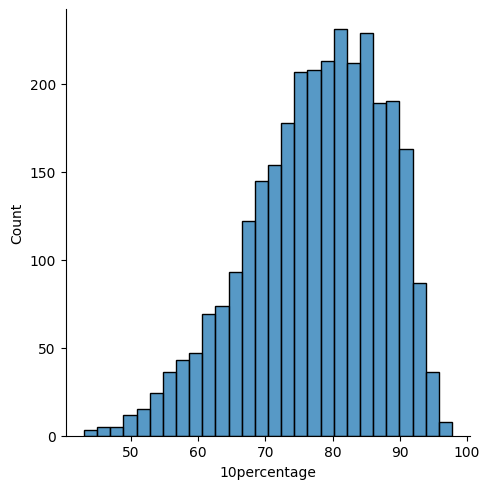

In [28]:
import seaborn as sns
sns.displot(data_numerical['10percentage'])

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# MinMaxScaler
scaler = MinMaxScaler()
df = pd.read_csv("Engineering_graduate_salary_updated.csv")
df_minmax_scaled = df.copy()
col_names = ['10percentage', '12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
features = df_minmax_scaled[col_names]
df_minmax_scaled[col_names] = scaler.fit_transform(features.values)
df_minmax_scaled.to_csv('minmax.csv')

# Standard Scaler
scaler = StandardScaler()
df_standard_scaled = df.copy()
col_names = ['10percentage', '12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
features = df_standard_scaled[col_names]
df_standard_scaled[col_names] = scaler.fit_transform(features.values)
df_standard_scaled.to_csv('standard.csv')

# Robust Scaler
scaler = RobustScaler()
df_robust_scaled = df.copy()
col_names = ['10percentage', '12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
features = df_robust_scaled[col_names]
df_robust_scaled[col_names] = scaler.fit_transform(features.values)
df_robust_scaled.to_csv('robust.csv')

print("MinMax Scaler\n", df_minmax_scaled.head())
print("Standard Scaler\n", df_standard_scaled.head())
print("Robust Scaler\n", df_robust_scaled.head())

MinMax Scaler
    Unnamed: 0  10percentage  12graduation  12percentage  CollegeID  \
0           0      0.818115          2009      0.749574       6920   
1           1      0.255661          2010      0.417376       6624   
2           2      0.626917          2007      0.769506       9084   
3           3      0.754200          2009      0.783646       8195   
4           4      0.712199          2008      0.596252       4889   

   CollegeTier  Degree  collegeGPA  CollegeCityID  CollegeCityTier  ...  \
0            1       0    0.720150           6920                1  ...   
1            2       0    0.625616           6624                0  ...   
2            2       0    0.592819           9084                0  ...   
3            1       0    0.790675           8195                1  ...   
4            2       0    0.618114           4889                1  ...   

   CollegeState_Orissa  CollegeState_Punjab  CollegeState_Rajasthan  \
0                False                Fals

In [31]:
df = pd.DataFrame(data[['Salary', 'ID', '12graduation',]].values, columns=['Salary','ID','12graduation'])
df.head()

,Salary,ID,12graduation
0,445000,604399,2009
1,110000,988334,2010
2,255000,301647,2007
3,420000,582313,2009
4,200000,339001,2008


In [33]:
# MinMax Scaler
df_scaled = df.copy()
col_names = ['Salary','ID','12graduation']
features = df_scaled[col_names]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,Salary,ID,12graduation
0,0.103405,0.461013,0.785714
1,0.018916,0.759416,0.857143
2,0.055485,0.225708,0.642857
3,0.097100,0.443848,0.785714
4,0.041614,0.254740,0.714286


In [34]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,Salary,ID,12graduation
0,0.658634,-0.165811,0.563442
1,-0.919353,0.886544,1.176359
2,-0.236344,-0.995646,-0.662392
3,0.540874,-0.226348,0.563442
4,-0.495416,-0.893259,-0.049475


In [35]:
# Robust Scaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,Salary,ID,12graduation
0,0.763158,-0.053340,0.5
1,-1.000000,0.526875,1.0
2,-0.236842,-0.510868,-0.5
3,0.631579,-0.086717,0.5
4,-0.526316,-0.454417,0.0


### Correlation

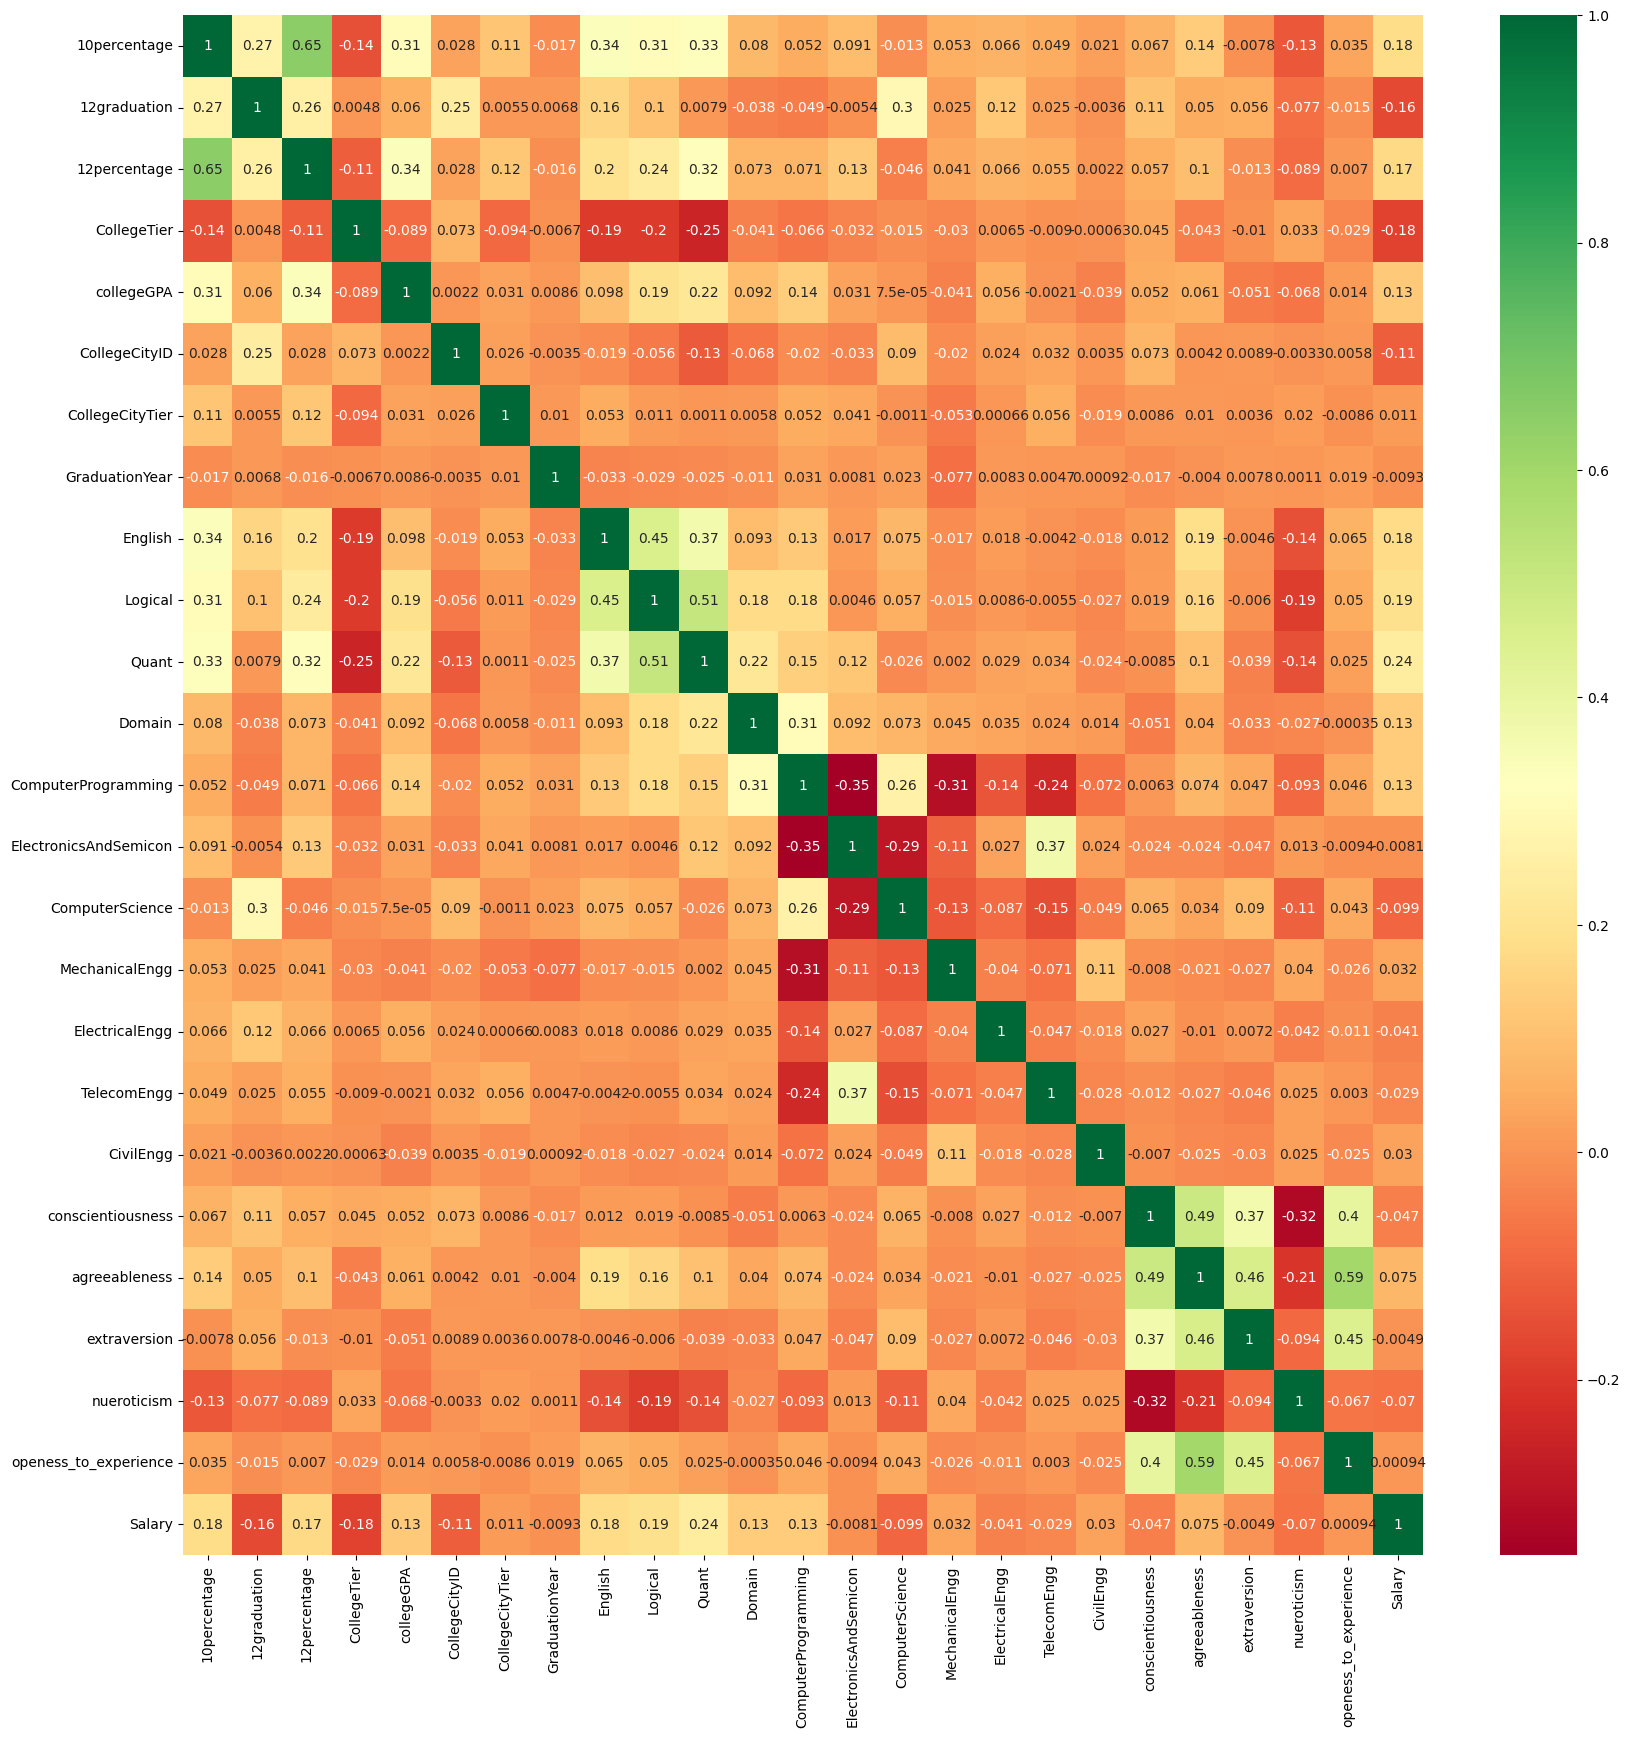

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# dropping unwanted columns
data.drop(['ID', 'CollegeID'], axis=1, inplace=True)

# getting correlations of each features in dataset
corr_mat = data.corr(numeric_only=True)
top_corr_features = corr_mat.index

# plotting the figure using matplot lib
plt.figure(figsize=(20,20))

# plotting heatmap using seaborn
x = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")


In [45]:
data.corr(numeric_only=True)

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
10percentage,1.000000,0.273813,0.645578,-0.144178,0.311209,0.028314,0.114770,-0.017208,0.338180,0.309558,...,0.053343,0.065815,0.049500,0.021410,0.066644,0.136332,-0.007811,-0.131151,0.034869,0.181414
12graduation,0.273813,1.000000,0.255780,0.004834,0.059786,0.247979,0.005517,0.006758,0.163822,0.103767,...,0.025015,0.124642,0.025286,-0.003610,0.110645,0.050309,0.055530,-0.076572,-0.015313,-0.161793
12percentage,0.645578,0.255780,1.000000,-0.113101,0.335041,0.027538,0.119783,-0.015845,0.196749,0.237480,...,0.041109,0.065761,0.055003,0.002204,0.057277,0.099645,-0.012765,-0.088635,0.007041,0.172755
CollegeTier,-0.144178,0.004834,-0.113101,1.000000,-0.088604,0.072848,-0.094247,-0.006719,-0.194173,-0.195125,...,-0.029641,0.006484,-0.008976,-0.000627,0.045099,-0.042588,-0.010184,0.033292,-0.029322,-0.177975
collegeGPA,0.311209,0.059786,0.335041,-0.088604,1.000000,0.002161,0.030960,0.008562,0.097937,0.192549,...,-0.040812,0.056289,-0.002096,-0.039379,0.052435,0.060789,-0.050995,-0.067701,0.013691,0.131912
CollegeCityID,0.028314,0.247979,0.027538,0.072848,0.002161,1.000000,0.026276,-0.003479,-0.019085,-0.056061,...,-0.020409,0.024191,0.031839,0.003540,0.073101,0.004176,0.008856,-0.003315,0.005774,-0.114908
CollegeCityTier,0.114770,0.005517,0.119783,-0.094247,0.030960,0.026276,1.000000,0.010217,0.052540,0.011322,...,-0.052892,0.000664,0.056309,-0.018694,0.008559,0.010270,0.003624,0.020456,-0.008650,0.011149
GraduationYear,-0.017208,0.006758,-0.015845,-0.006719,0.008562,-0.003479,0.010217,1.000000,-0.033115,-0.029016,...,-0.076916,0.008299,0.004720,0.000920,-0.016745,-0.003956,0.007781,0.001144,0.019407,-0.009333
English,0.338180,0.163822,0.196749,-0.194173,0.097937,-0.019085,0.052540,-0.033115,1.000000,0.453521,...,-0.017085,0.017738,-0.004181,-0.018049,0.012262,0.189898,-0.004638,-0.143988,0.064542,0.178084
Logical,0.309558,0.103767,0.237480,-0.195125,0.192549,-0.056061,0.011322,-0.029016,0.453521,1.000000,...,-0.015491,0.008607,-0.005502,-0.027270,0.018574,0.159086,-0.006037,-0.187744,0.049579,0.193647


### Inference:
1. Percentages and CGPA are the best correlated

2. ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, extraversion, neuroticism, openesstoexperience are the variables which are least correlated